## This notebook is a preliminary exploratory  analysis for the purpose of showcasing EDA and data prep skills for my application to the Data Analyst role at Numerator

This dataset is taken from Kaggle: https://www.kaggle.com/neuromusic/avocado-prices/data

The dataset contains retail sales data for avocados in various regions. I chose this dataset because it seems  comparable to data that would be useful to a Numerator client. A national grocery chain might use this data to create pricing strategies for various regions, gain insights on product trends over time, or for pricing forecasting.

From Kaggle, here's how the Hass Avocado Board describes the data on their website:

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

- Date - The date of the observation
- AveragePrice - the average price of a single avocado
- type - conventional or organic
- year - the year
- Region - the city or region of the observation
- Total Volume - Total number of avocados sold
- 4046 - Total number of avocados with PLU 4046 sold
- 4225 - Total number of avocados with PLU 4225 sold
- 4770 - Total number of avocados with PLU 4770 sold

In [148]:
#import packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [149]:
#Read our .csv file into a pandas dataframe

df = pd.read_csv("avocado.csv")

In [150]:
#First, let's look at the head of the dataset and the data types for each column

df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


It's unclear right now what the first column (unnamed) represents. My first guess is it's a leftover index column from the .csv file. We'll ignore for now as it's not causing any trouble.

Now, let's check datatypes

In [182]:
df.dtypes

Unnamed: 0               int64
Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
month                    int64
type_enc                 int32
dtype: object

In [183]:
#Converting the date column to a datetime object:

df['Date'] = pd.to_datetime(df['Date'])

#checking it worked
df.dtypes

Unnamed: 0               int64
Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
month                    int64
type_enc                 int32
dtype: object

In [184]:
#Compute summary statistics for all our columns

df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,month,type_enc
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,6.177215,0.499918
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,3.534130,0.500014
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,1.000000,0.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,3.000000,0.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,6.000000,0.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,9.000000,1.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,12.000000,1.000000


In [154]:
#Let's look at what values we have for regions

df['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

This column is a bit of a mess. We have single cities, combinations of cities (e.g. BaltimoreWashington,states, regions (West, Northeast, GreatLakes, etc.), and totalUS.Depending on the scope, these should be separated in order to analyze our data properly

I'm not going to use regions in my analysis, but I'll create lists that could be used to separate groups in the future

In [185]:
state_list = ['California', 'NewYork', 'SouthCarolina']

#Assuming for now that NewYork is the state, not the city. Would have to be verified.

region_list = ['Midsouth', 'Northeast', 'SouthCentral', 'Southeast', 'West', 'GreatLakes']


In [186]:
# Checking for null values

print(df.isnull().sum())

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
month           0
type_enc        0
dtype: int64


# No nulls!

Box plots are one of my favourite ways to visualize data. Let's compare the overall price of conventional vs. organic avocados

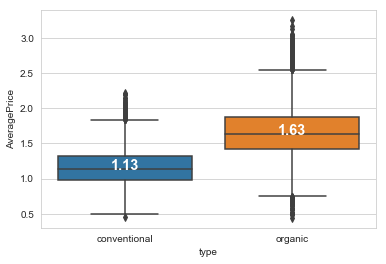

In [157]:
#Create the plot
sns.set_style('whitegrid')
ax = sns.boxplot(x='type', y='AveragePrice', data=df)

#Calculating the medians to display on the boxplot
medians = df.groupby(['type'])['AveragePrice'].median().values
median_labels = [str(np.round(s, 2)) for s in medians]
pos = range(len(medians))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick], median_labels[tick], 
            horizontalalignment='center', size='x-large', color='w', weight='semibold')


We can see above that the median price of organic avocados is higher than conventional (as expected). There is also a wider range of prices and more outliers for organic avocado prices.

Interestingly, it looks like the  minimum value for average price across both types was for organic avocados. Let's take a look at that entry.

In [158]:
df.loc[df.groupby('type')['AveragePrice'].idxmin()]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
7412,47,2017-02-05,0.46,2200550.27,1200632.86,531226.65,18324.93,450365.83,113752.17,330583.10,6030.56,conventional,2017,PhoenixTucson
15261,43,2017-03-05,0.44,64057.04,223.84,4748.88,0.00,59084.32,638.68,58445.64,0.00,organic,2017,CincinnatiDayton


 Looks like March 2017 in Cincinnati/Daytona was the best month/location to be buying organic avocados, and they were cheaper than the best price by month/location for conventional avocadoes. 

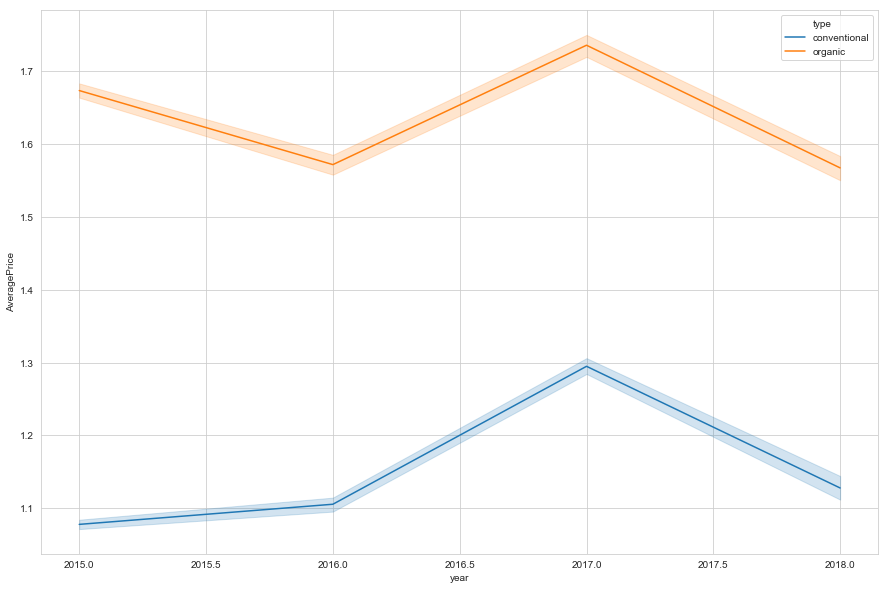

In [159]:
# Let's look at high level trends over time by price. 

plt.figure(figsize = (15,10))
sns.lineplot(x='year', y='AveragePrice', hue='type', data=df)
plt.show()

Looks like there was a spike in 2017.

According to this article, there was a reduced harvest which caused prices to spike. https://www.bbc.com/news/business-39768480

Let's look at overall trends in different months of the year:

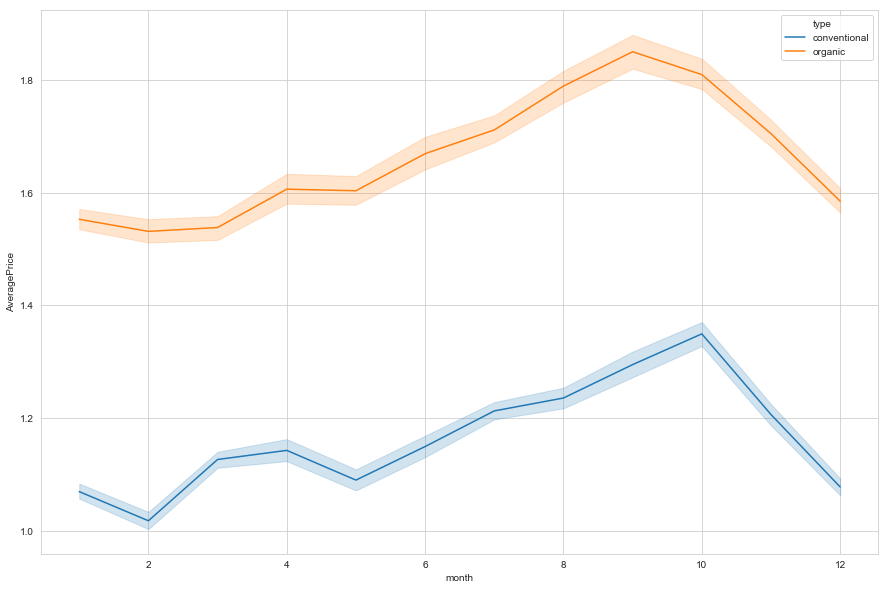

In [160]:
#Create a column for the month of the year

df['month'] = df['Date'].dt.month

plt.figure(figsize = (15,10))
sns.lineplot(x='month', y='AveragePrice', hue='type', data=df)
plt.show()

There appears to be a spike in prices around September/October. My guess is this is related to harvest timing.

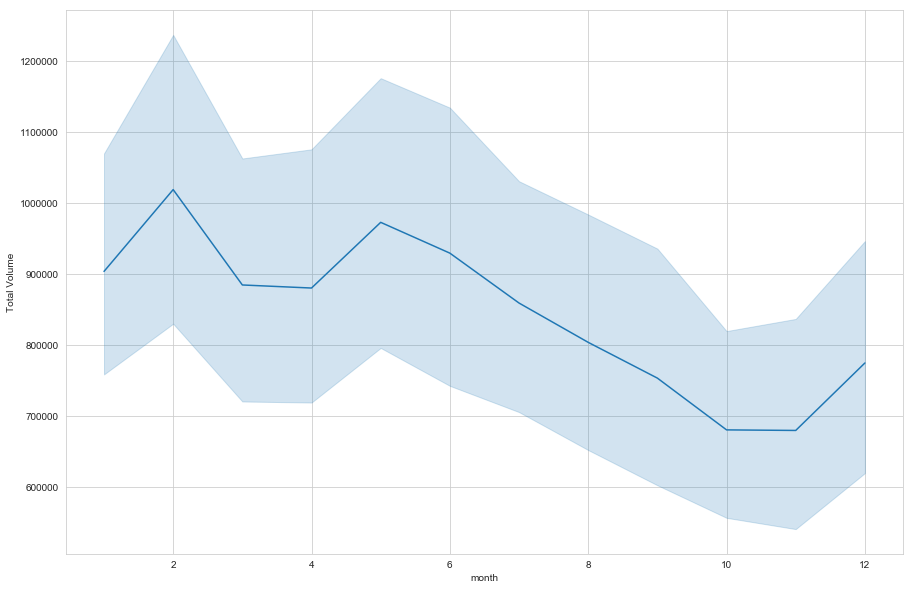

In [161]:
#Let's compare with the total volume of avocadoes purchased in different months of the year

plt.figure(figsize = (15,10))
sns.lineplot(x='month', y='Total Volume', data=df)
plt.show()

There appears to be an inverse relationship suggesting that pople buy more avocadoes when they cost less. Let's plot this relationship

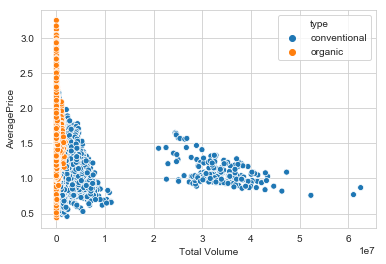

In [162]:
sns.scatterplot(x='Total Volume', y='AveragePrice', hue='type', data=df)

There does appear to be a correlation but our x-axis scaling makes it difficult to see the relationship for the organic type. Let's plot a heatmap of the correlations of all our columns

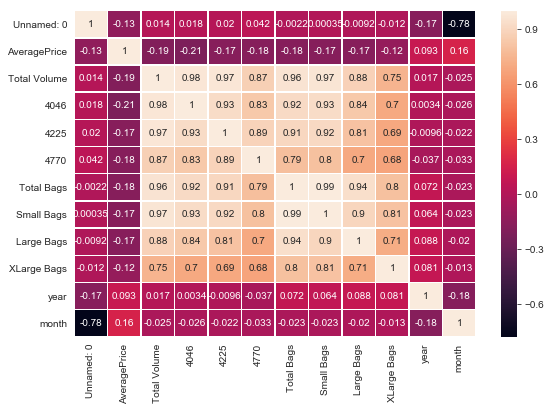

In [163]:
#Plotting correlation heatmap

corr = df.corr(method='pearson')

f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(corr, annot=True, linewidths=0.5, )

I noticed that our 'type' column got dropped. We need to encode the values because the data is categorical.

In [164]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
dicts = {}

label.fit(df.type.drop_duplicates()) 
dicts['type'] = list(label.classes_)
df['type_enc'] = label.transform(df.type) 

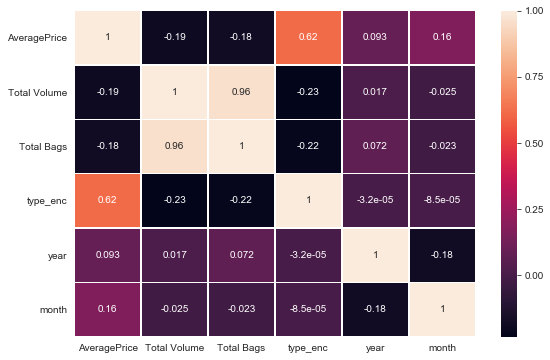

In [168]:
#Let's ignore the different PLUs and bag size columns for now

cols = ['AveragePrice', 'Total Volume', 'Total Bags', 'type_enc', 'year', 'month']

corr = df[cols].corr(method='pearson')

f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(corr, annot=True, linewidths=0.5)



We can see there is a strong correlation between type and average price.

There is lots left to explore in the dataset but this is where I'll leave it. Thanks for reading!